In [68]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Load CSVs

df1= pd.read_csv("data.csv")
df= pd.read_csv("brca_data_w_subtypes.csv")


In [70]:
print( df.shape)
print( df1.shape)



(705, 1941)
(705, 1937)


In [71]:
df.columns

Index(['rs_CLEC3A', 'rs_CPB1', 'rs_SCGB2A2', 'rs_SCGB1D2', 'rs_TFF1',
       'rs_MUCL1', 'rs_GSTM1', 'rs_PIP', 'rs_ADIPOQ', 'rs_ADH1B',
       ...
       'pp_p62.LCK.ligand', 'pp_p70S6K', 'pp_p70S6K.pT389', 'pp_p90RSK',
       'pp_p90RSK.pT359.S363', 'vital.status', 'PR.Status', 'ER.Status',
       'HER2.Final.Status', 'histological.type'],
      dtype='object', length=1941)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 1941 entries, rs_CLEC3A to histological.type
dtypes: float64(827), int64(1110), object(4)
memory usage: 10.4+ MB


In [73]:
df.head()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status,PR.Status,ER.Status,HER2.Final.Status,histological.type
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0,Positive,Positive,Negative,infiltrating ductal carcinoma
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,0.279067,0.292925,-0.155242,-0.089365,0.267530,0,Positive,Negative,Negative,infiltrating ductal carcinoma
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0,Positive,Positive,Negative,infiltrating ductal carcinoma
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0,Positive,Positive,Negative,infiltrating ductal carcinoma
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0,Positive,Positive,Negative,infiltrating ductal carcinoma


In [74]:
df1.head()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.043330,-0.002598,0.449228,-0.375230,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,-0.220764,0.220809,1.035115,-0.074136,0.279067,0.292925,-0.155242,-0.089365,0.267530,0
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.010615,-0.133214,0.344969,-0.351936,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,0.064070,-0.384008,0.678042,0.096329,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.065488,0.209858,0.920408,0.042210,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0


In [75]:
label_counts = df1["vital.status"].value_counts()
print(label_counts)

vital.status
0    611
1     94
Name: count, dtype: int64


In [76]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


HER2.Final.Status    145
PR.Status            122
ER.Status            122
dtype: int64


In [77]:
cat_cols = df.select_dtypes(include='object').columns
print(df[cat_cols].nunique())  # number of unique categories in each categorical column


PR.Status            5
ER.Status            5
HER2.Final.Status    4
histological.type    2
dtype: int64


In [78]:
df.describe()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,...,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,4.547197,6.487979,9.516678,7.351940,8.179439,7.806726,5.677454,8.721931,7.450675,7.747601,...,0.008589,0.004734,0.059332,-0.094355,0.109583,-0.028409,0.048929,-0.002065,0.019180,0.133333
std,4.971708,4.874769,4.758348,4.248440,4.291915,4.325965,4.331351,4.130467,4.244499,4.245585,...,0.254308,0.302194,0.544589,0.579644,0.811079,0.555587,0.377429,0.345646,0.291446,0.340176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.918200,-1.432959,-1.637550,-3.017238,-2.646594,-2.152630,-0.751501,-1.334300,-1.182336,0.000000
25%,0.000000,2.297602,5.937361,3.842758,5.144707,4.612299,1.436695,5.784499,4.171967,4.688113,...,-0.141888,-0.168875,-0.276563,-0.302937,-0.426244,-0.317636,-0.207172,-0.232004,-0.147140,0.000000
50%,2.379261,6.002963,10.011822,7.701500,9.043774,7.530813,5.866248,9.305378,7.999344,8.277510,...,-0.022655,0.006428,0.084549,-0.067906,-0.005234,-0.067527,-0.039654,-0.010013,0.006341,0.000000
75%,8.025802,9.503384,13.087360,10.493654,11.536532,11.157128,10.132437,11.948430,10.559780,10.785635,...,0.136848,0.183828,0.413358,0.180853,0.573340,0.206411,0.211573,0.212412,0.172476,0.000000
max,17.432087,20.960773,20.978437,19.979807,17.338611,19.132935,14.702210,18.662764,17.355330,17.892925,...,1.051862,1.483391,2.349841,2.069048,3.043258,2.475027,1.664292,1.545965,1.062551,1.000000


### Label Encoding

In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = ['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']

# Replace missing values with 'unknown'
df[cat_cols] = df[cat_cols].fillna('unknown')

# Encode categorical variables
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


print(df[cat_cols].head())
print(df[cat_cols].isnull().sum())  

   PR.Status  ER.Status  HER2.Final.Status  histological.type
0          4          4                  1                  0
1          4          1                  1                  0
2          4          4                  1                  0
3          4          4                  1                  0
4          4          4                  1                  0
PR.Status            0
ER.Status            0
HER2.Final.Status    0
histological.type    0
dtype: int64


In [80]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('vital.status', axis=1)
y = df['vital.status']

# Stratified split to keep class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train: (564, 1940) X_test: (141, 1940)
y_train distribution:
 vital.status
0    489
1     75
Name: count, dtype: int64
y_test distribution:
 vital.status
0    122
1     19
Name: count, dtype: int64


In [81]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

#  Train Random Forest on training data
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)




RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [82]:
# 2️ Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)


In [83]:
# 3️ Select top N features
top_n = 50
top_features = feature_importance_df['feature'].iloc[:top_n].tolist()
print("Top features:", top_features)

# 4️ Reduce training and test sets
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

print("Reduced X_train shape:", X_train_top.shape)
print("Reduced X_test shape:", X_test_top.shape)


Top features: ['rs_C14orf180', 'rs_MUC15', 'rs_RBP4', 'rs_ADH1C', 'rs_SLC7A2', 'rs_LGALS12', 'rs_SLC7A10', 'rs_ANO3', 'rs_PLA2G2D', 'rs_HIF3A', 'rs_ZNF385B', 'rs_ACVR1C', 'rs_GPD1', 'rs_AQP7P1', 'rs_LEP', 'rs_ALOX15', 'pp_ATM', 'rs_KCNIP2', 'rs_FOSB', 'rs_PLIN1', 'rs_APOB', 'rs_PSCA', 'rs_CIDEC', 'rs_TRPV6', 'rs_TUSC5', 'rs_EPYC', 'rs_HEPN1', 'rs_PCK1', 'rs_SCUBE2', 'rs_CST1', 'rs_LOC283392', 'rs_CA4', 'rs_PIK3C2G', 'rs_CLGN', 'pp_TFRC', 'rs_TMEM132C', 'rs_CES1', 'rs_HEPACAM', 'rs_GRM4', 'rs_TFF1', 'rs_TMPRSS4', 'rs_COL2A1', 'rs_IYD', 'rs_DSG1', 'rs_ADH1A', 'pp_BRD4', 'rs_SHISA9', 'rs_ACADL', 'rs_PROM1', 'rs_FMO2']
Reduced X_train shape: (564, 50)
Reduced X_test shape: (141, 50)


In [84]:
from sklearn.preprocessing import StandardScaler

# Make copies of top 50 features
X_train_scaled = X_train_top.copy()
X_test_scaled = X_test_top.copy()

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)



In [85]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

In [86]:


# 1️ Initialize models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
}

# 2️ Train and evaluate
results = {}
plt.figure(figsize=(8,6))

for name, model in models.items():
    # Train
    model.fit(X_train_top, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_top)
    y_proba = model.predict_proba(X_test_top)[:,1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    results[name] = {'Accuracy': acc, 'F1-score': f1, 'ROC-AUC': roc_auc}
    


<Figure size 800x600 with 0 Axes>

In [87]:
# 4️ Print results
results_df = pd.DataFrame(results).T
print(results_df)


                    Accuracy  F1-score   ROC-AUC
RandomForest        0.886525  0.333333  0.630932
LogisticRegression  0.723404  0.264151  0.593184
SVM                 0.808511  0.307692  0.588007



=== RandomForest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       122
           1       0.80      0.21      0.33        19

    accuracy                           0.89       141
   macro avg       0.84      0.60      0.64       141
weighted avg       0.88      0.89      0.86       141



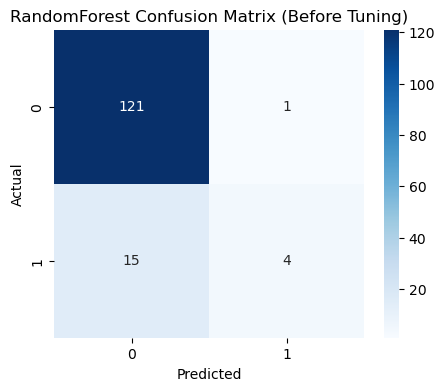


=== LogisticRegression ===
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       122
           1       0.23      0.42      0.30        19

    accuracy                           0.73       141
   macro avg       0.56      0.60      0.56       141
weighted avg       0.81      0.73      0.76       141



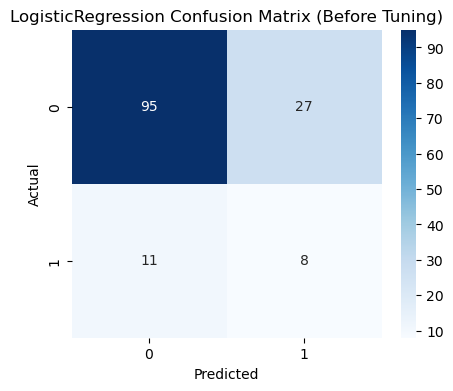


=== SVM ===
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       122
           1       0.33      0.32      0.32        19

    accuracy                           0.82       141
   macro avg       0.61      0.61      0.61       141
weighted avg       0.82      0.82      0.82       141



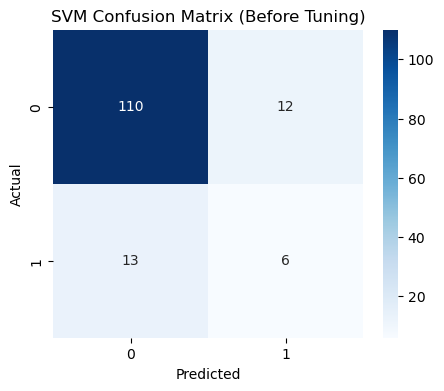

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Train LR & SVM on training set (top features)
models['LogisticRegression'].fit(X_train_scaled, y_train)
models['SVM'].fit(X_train_scaled, y_train)

# Evaluate each model
for name, model in models.items():
    if name in ['LogisticRegression', 'SVM']:
        X_te = X_test_scaled
    else:
        X_te = X_test_top

    y_pred = model.predict(X_te)
    
    print(f"\n=== {name} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix (Before Tuning)')
    plt.show()


### Hyperparameter tuning

In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_cv = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
rf_cv.fit(X_train_top, y_train)

print("Best RF params:", rf_cv.best_params_)
print("Best RF ROC-AUC (CV):", rf_cv.best_score_)


Best RF params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best RF ROC-AUC (CV): 0.795097832947612


In [90]:
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    
}
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_cv = GridSearchCV(lr, param_grid=lr_params, cv=5, scoring='roc_auc', n_jobs=-1)
lr_cv.fit(X_train_scaled, y_train)
print("Best LR params:", lr_cv.best_params_)


Best LR params: {'C': 0.01, 'penalty': 'l2'}


In [91]:
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}
svm = SVC(probability=True, class_weight='balanced', random_state=42)
svm_cv = GridSearchCV(svm, param_grid=svm_params, cv=5, scoring='roc_auc', n_jobs=-1)
svm_cv.fit(X_train_scaled, y_train)
print("Best SVM params:", svm_cv.best_params_)


Best SVM params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [92]:
best_models = {
    'RandomForest': rf_cv.best_estimator_,
    'LogisticRegression': lr_cv.best_estimator_,
    'SVM': svm_cv.best_estimator_
}

results = {}
plt.figure(figsize=(8,6))

for name, model in best_models.items():
    if name in ['LogisticRegression', 'SVM']:
        X_te = X_test_scaled
    else:
        X_te = X_test_top
    
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    results[name] = {'Accuracy': acc, 'F1-score': f1, 'ROC-AUC': roc_auc}
   
results_df = pd.DataFrame(results).T
print(results_df)

                    Accuracy  F1-score   ROC-AUC
RandomForest        0.886525  0.333333  0.639344
LogisticRegression  0.716312  0.285714  0.603106
SVM                 0.822695  0.324324  0.588007


<Figure size 800x600 with 0 Axes>


=== RandomForest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       122
           1       0.80      0.21      0.33        19

    accuracy                           0.89       141
   macro avg       0.84      0.60      0.64       141
weighted avg       0.88      0.89      0.86       141



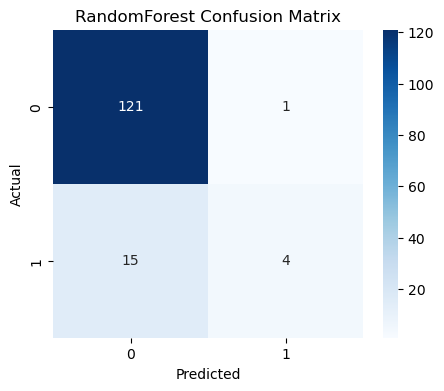


=== LogisticRegression ===
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       122
           1       0.22      0.42      0.29        19

    accuracy                           0.72       141
   macro avg       0.56      0.59      0.55       141
weighted avg       0.80      0.72      0.75       141



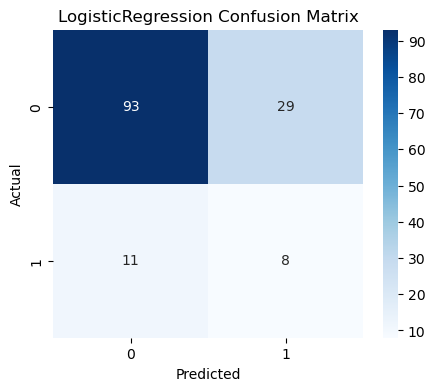


=== SVM ===
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       122
           1       0.33      0.32      0.32        19

    accuracy                           0.82       141
   macro avg       0.61      0.61      0.61       141
weighted avg       0.82      0.82      0.82       141



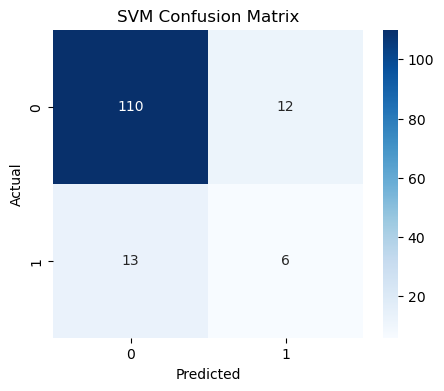

In [93]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
for name, model in best_models.items():
    # Select appropriate test set
    if name in ['LogisticRegression', 'SVM']:
        X_te = X_test_scaled
    else:
        X_te = X_test_top
    
    y_pred = model.predict(X_te)
    
    print(f"\n=== {name} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()


In [94]:
!pip install imbalanced-learn


In [95]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on training data
X_train_res, y_train_res = smote.fit_resample(X_train_top, y_train)

print("Original training set shape:", X_train_top.shape, y_train.value_counts())
print("Resampled training set shape:", X_train_res.shape, pd.Series(y_train_res).value_counts())


Original training set shape: (564, 50) vital.status
0    489
1     75
Name: count, dtype: int64
Resampled training set shape: (978, 50) vital.status
1    489
0    489
Name: count, dtype: int64


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Random Forest
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_res, y_train_res)

# Logistic Regression
lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_train_res, y_train_res)

# SVM
svm_smote = SVC(kernel='rbf', probability=True, random_state=42)
svm_smote.fit(X_train_res, y_train_res)


SVC(probability=True, random_state=42)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

models = {'RandomForest': rf_smote, 'LogisticRegression': lr_smote, 'SVM': svm_smote}

for name, model in models.items():
    y_pred = model.predict(X_test_top)
    print(f"\n=== {name} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)



=== RandomForest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       122
           1       0.50      0.32      0.39        19

    accuracy                           0.87       141
   macro avg       0.70      0.63      0.66       141
weighted avg       0.85      0.87      0.85       141

Confusion Matrix:
 [[116   6]
 [ 13   6]]

=== LogisticRegression ===
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       122
           1       0.23      0.37      0.29        19

    accuracy                           0.75       141
   macro avg       0.56      0.59      0.57       141
weighted avg       0.80      0.75      0.77       141

Confusion Matrix:
 [[99 23]
 [12  7]]

=== SVM ===
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       122
           1       0.32  